In [1]:
import time
import pandas as pd
import pandapower as pp
import numpy as np
import matplotlib.pyplot as plt
import os
from pandapower.plotting.plotly import pf_res_plotly
from pandapower.plotting.plotly import simple_plotly

import Utils.Network as Network
import Utils.Limits as Limits
import Utils.Network as Network
import Utils.utils as utils

# Import Network

In [ ]:
from pickletools import markobject


input_path = '../Data/Input'
output_path = '../Data/Output'

network_obj = Network.Network(input_path)

feeder_colors = ['#ff7f0e', '#9467bd']
feeder_colors_after = [utils.scale_lightness(c, 0.6) for c in feeder_colors]

meaningful_days = [15, 83, 162, 241, 324]
timesteps = network_obj.get_meaningful_days_timesteps(meaningful_days)

limits_obj = Limits.Limits(network_obj)

market_obj = Network.Network(network_obj, limits_obj)

In [ ]:
ga_obj = limits_obj.calculate_limits()

In [5]:
def plot_P(self,number=-1, limits=None):
    for i,c in self.net.load[:number].iterrows():
        ean = c['ean']
        for p in self.avalilable_phases:
            plt.plot(self.P.iloc[self.timesteps][f'{ean}_{p}'].values)
        if limits is not None:
            plt.axhline(y=limits[i,0], color='r', linestyle='--')
            plt.axhline(y=limits[i,1], color='r', linestyle='--')
        
        print(f"Client ean: {ean}. \n Load: #phases: {c['ph_load']}, consumption: {c['ann_cons']}. \n PV: #phases: {c['ph_pv']}, consumption: {c['ann_pv_prod']}. \n EV: #phases: {c['ph_ev']}, consumption: {c['ann_ev_cons']}.")
        plt.show()

Client ean: 110. 
 Load: #phases: A, consumption: 3081. 
 PV: #phases: A, consumption: 3378.0. 
 EV: #phases: A, consumption: 1225.0.


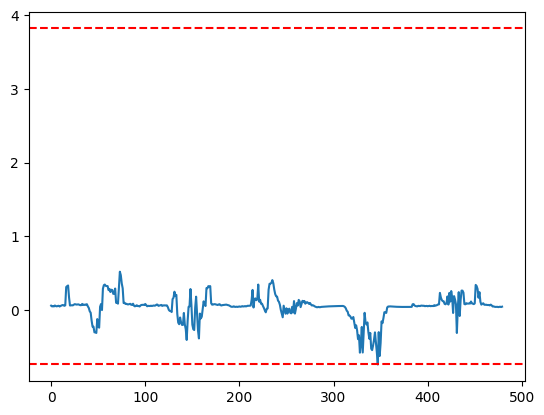

Client ean: 111. 
 Load: #phases: A, consumption: 5769. 
 PV: #phases: A, consumption: 3745.0. 
 EV: #phases: A, consumption: 1225.0.


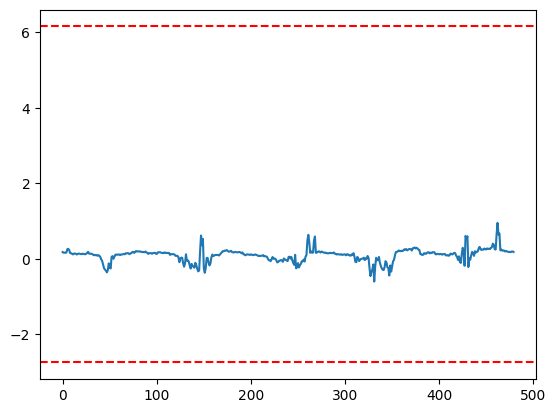

Client ean: 112. 
 Load: #phases: A, consumption: 18706. 
 PV: #phases: A, consumption: 2848.0. 
 EV: #phases: , consumption: nan.


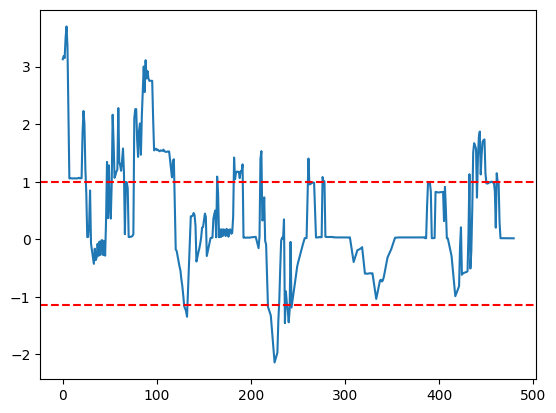

Client ean: 113. 
 Load: #phases: A, consumption: 17598. 
 PV: #phases: A, consumption: 2848.0. 
 EV: #phases: , consumption: nan.


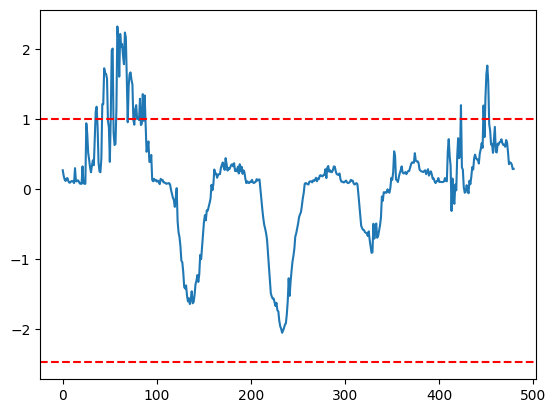

In [10]:
plot_P(network_obj, 4, limits=limits_obj.limits)

In [ ]:
limits_obj.limits

In [73]:
def submit_orders(self):
    #This does not allow for more than one request: either a BUY or SELL, not both
    #TODO: fix this if needed
    minimum_order_request = 0.050 #kW
    price = 0.001
    for idx, row in self.net.load.iterrows(): 
        energy_usage = row['p_mw'] * 1000
        # print(f"{energy_usage:.3f}", limits_obj.limits[idx,:])
        if(energy_usage>0): #Consumption
            limit = limits_obj.limits[idx, 1]
            diff = limit - energy_usage

            if(abs(diff) > minimum_order_request):
                if diff > 0:
                    create_order(row, "SELL", diff, price)
                else:
                    create_order(row, "BUY", abs(diff), 2*price)
        else: #Generation
            limit = limits_obj.limits[idx, 0]
            diff = limit - energy_usage

            if(abs(diff) > minimum_order_request):
                if diff < 0:
                    create_order(row, "SELL", diff, price)
                else:
                    create_order(row, "BUY", diff, 2*price)
        # print()

def create_order(customer, order_type, amount, price=0.1, time=-1):
    print(f"#Creating {order_type} order for customer {customer['ean']}: {amount:.2f}kW at {price}$ for {time} timesteps")

In [74]:
network_obj.load_time_series_at_timestep(network_obj.net, 0)

In [75]:
submit_orders(network_obj)

#Creating SELL order for customer 110: 3.76kW at 0.001$ for -1 timesteps
#Creating SELL order for customer 111: 6.03kW at 0.001$ for -1 timesteps
#Creating SELL order for customer 112: 0.98kW at 0.001$ for -1 timesteps
#Creating SELL order for customer 114: 1.65kW at 0.001$ for -1 timesteps
#Creating SELL order for customer 115: 0.85kW at 0.001$ for -1 timesteps
#Creating SELL order for customer 116: 0.87kW at 0.001$ for -1 timesteps
#Creating SELL order for customer 117: 2.50kW at 0.001$ for -1 timesteps
#Creating SELL order for customer 118: 0.95kW at 0.001$ for -1 timesteps
#Creating BUY order for customer 119: 0.18kW at 0.002$ for -1 timesteps
#Creating SELL order for customer 120: 4.26kW at 0.001$ for -1 timesteps
#Creating SELL order for customer 121: 1.10kW at 0.001$ for -1 timesteps
#Creating SELL order for customer 122: 0.47kW at 0.001$ for -1 timesteps
#Creating SELL order for customer 123: 0.76kW at 0.001$ for -1 timesteps
#Creating SELL order for customer 124: 0.90kW at 0.0

In [ ]:
network_obj.P.plot()